In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

from dateutil import parser

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import matplotlib.dates as mdates

In [8]:
df = pd.read_csv('goldstock.csv')

In [9]:
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [10]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
df.head()

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2511 non-null   object 
 1   Close   2511 non-null   float64
 2   Volume  2511 non-null   float64
 3   Open    2511 non-null   float64
 4   High    2511 non-null   float64
 5   Low     2511 non-null   float64
dtypes: float64(5), object(1)
memory usage: 117.8+ KB


In [13]:
print(df.isnull().sum())

Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64


In [14]:
df.describe()

,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,298.824811,97600.769382,299.118187,301.262244,296.417703
min,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
df.head()

,Close,Volume,Open,High,Low
Date,,,,,
2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [16]:
df.set_index('Date', inplace=True)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Figure size 1400x700 with 0 Axes>

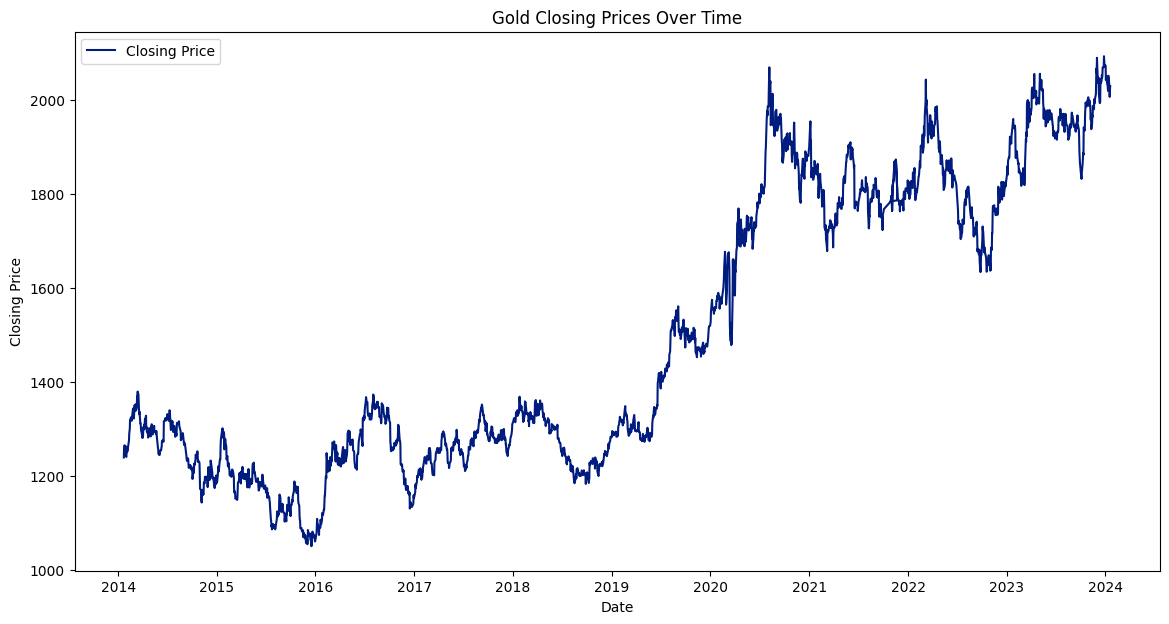

In [17]:
print(plt.style.available)

plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(14, 7))

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.title('Gold Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

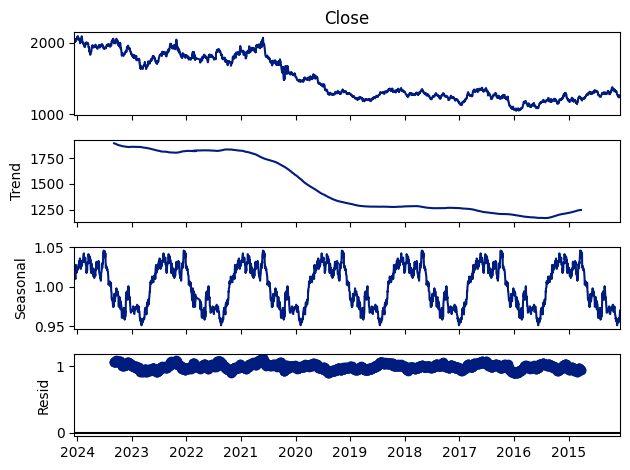

In [19]:
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=365)
decomposition.plot()
plt.show()

In [20]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Split the data into train and test sets
train = df['Close'][:int(0.8 * len(df))]
test = df['Close'][int(0.8 * len(df)):]

In [21]:
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so w

In [22]:
forecast = model_fit.forecast(steps=len(test))
test.index = forecast.index

c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


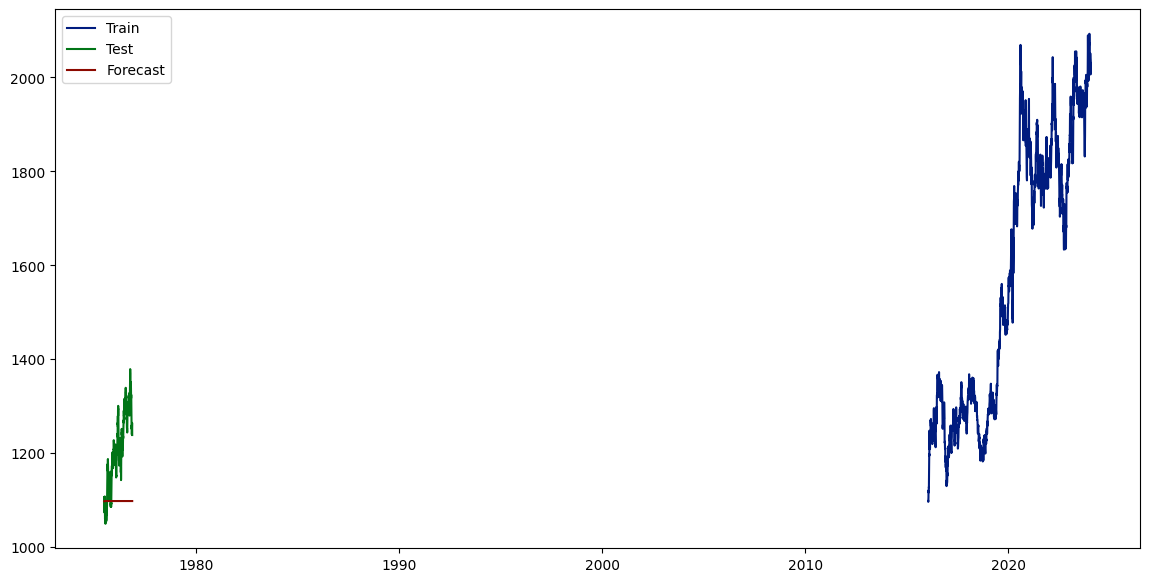

In [23]:
plt.figure(figsize=(14, 7))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

In [24]:
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse}')

RMSE: 135.8767871192417


In [25]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

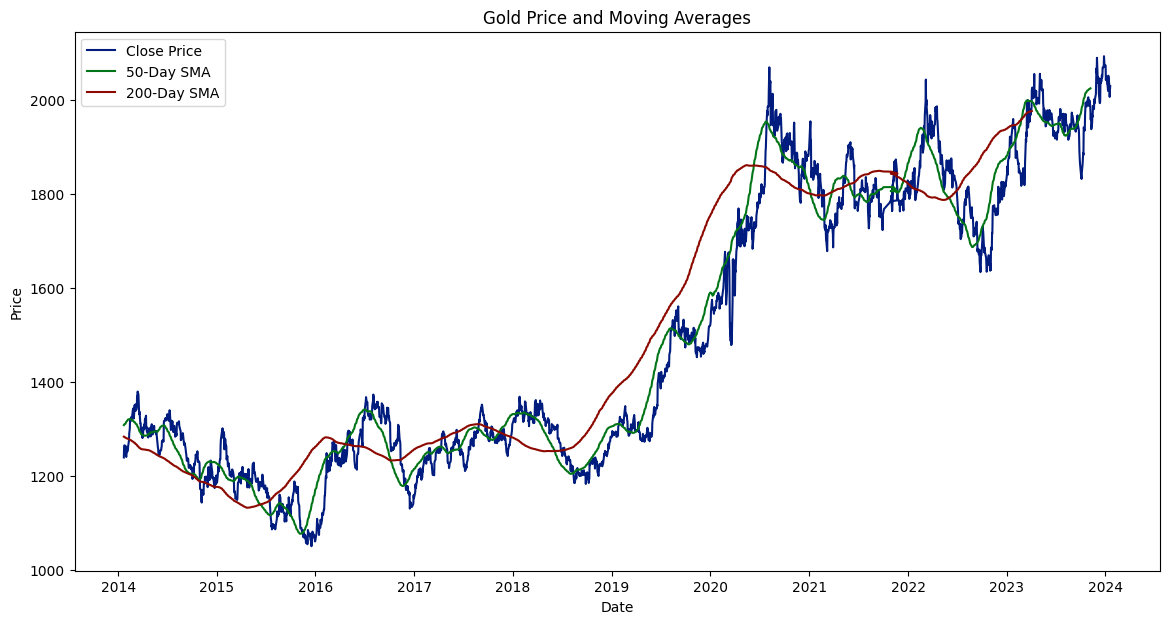

In [26]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_50'], label='50-Day SMA')
plt.plot(df['SMA_200'], label='200-Day SMA')
plt.title('Gold Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()